<a href="https://colab.research.google.com/github/CharuRana2006/Deep-Learning-2025-26-Charu-Rana/blob/main/deeplearning_14_1_26.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# write a python program to display the meta data in the following manner:
 1) upload in collab folder
 2) mounting of drive
 3)with the help of token and kaggle

In [1]:
import numpy as np
import struct
import pandas as pd
def load_mnist_idx(filename):
    with open(filename, 'rb') as f:
        magic = struct.unpack('>I', f.read(4))[0]

        if magic == 2051:  # Images
            num_images = struct.unpack('>I', f.read(4))[0]
            rows = struct.unpack('>I', f.read(4))[0]
            cols = struct.unpack('>I', f.read(4))[0]
            data = np.frombuffer(f.read(), dtype=np.uint8)
            data = data.reshape(num_images, rows, cols)
            return data

        elif magic == 2049:  # Labels
            num_labels = struct.unpack('>I', f.read(4))[0]
            data = np.frombuffer(f.read(), dtype=np.uint8)
            return data

        else:
            raise ValueError("Invalid MNIST IDX file")

print('--- Loading Training Data ---')
train_images = load_mnist_idx('/content/train-images-idx3-ubyte')
train_labels = load_mnist_idx('/content/train-labels-idx1-ubyte')

print('\n--- Loading Test Data ---')
test_images = load_mnist_idx('/content/t10k-images-idx3-ubyte')
test_labels = load_mnist_idx('/content/t10k-labels-idx1-ubyte')

print('\n--- Metadata for Training Images ---')
print(f"Shape: {train_images.shape}")
print(f"Data Type: {train_images.dtype}")
print(f"Number of Samples: {train_images.shape[0]}")

print('\n--- Metadata for Training Labels ---')
print(f"Shape: {train_labels.shape}")
print(f"Data Type: {train_labels.dtype}")
print(f"Number of Samples: {train_labels.shape[0]}")
print("Label Distribution:")
print(pd.Series(train_labels).value_counts().sort_index())

print('\n--- Metadata for Test Images ---')
print(f"Shape: {test_images.shape}")
print(f"Data Type: {test_images.dtype}")
print(f"Number of Samples: {test_images.shape[0]}")

print('\n--- Metadata for Test Labels ---')
print(f"Shape: {test_labels.shape}")
print(f"Data Type: {test_labels.dtype}")
print(f"Number of Samples: {test_labels.shape[0]}")
print("Label Distribution:")
print(pd.Series(test_labels).value_counts().sort_index())

--- Loading Training Data ---

--- Loading Test Data ---

--- Metadata for Training Images ---
Shape: (60000, 28, 28)
Data Type: uint8
Number of Samples: 60000

--- Metadata for Training Labels ---
Shape: (60000,)
Data Type: uint8
Number of Samples: 60000
Label Distribution:
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

--- Metadata for Test Images ---
Shape: (10000, 28, 28)
Data Type: uint8
Number of Samples: 10000

--- Metadata for Test Labels ---
Shape: (10000,)
Data Type: uint8
Number of Samples: 10000
Label Distribution:
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

Using Colab cache for faster access to the 'mnist-dataset' dataset.


21 january 2026

https://www.kaggle.com/code/blackpianocat/mnist-dataset-machine-learning/notebook


In [2]:
import numpy as np
import struct

# -------------------------
# Function to load MNIST ubyte
# -------------------------
def load_mnist_images(filename, max_samples=None):
    with open(filename, 'rb') as f:
        # Read header
        magic, num, rows, cols = struct.unpack(">IIII", f.read(16))
        # Read data
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num, rows, cols)
        # Normalize to [0,1]
        images = images.astype(np.float32) / 255.0
        if max_samples:
            images = images[:max_samples]
        return images

def load_mnist_labels(filename, max_samples=None):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack(">II", f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        if max_samples:
            labels = labels[:max_samples]
        return labels

In [3]:
import kagglehub
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

# -------------------------
# Load small subset
# -------------------------
train_images = load_mnist_images(f'{path}/train-images.idx3-ubyte', max_samples=5000)
train_labels = load_mnist_labels(f'{path}/train-labels.idx1-ubyte', max_samples=5000)

test_images = load_mnist_images(f'{path}/t10k-images.idx3-ubyte', max_samples=1000)
test_labels = load_mnist_labels(f'{path}/t10k-labels.idx1-ubyte', max_samples=1000)

print("Train images:", train_images.shape)
print("Train labels:", train_labels.shape)
print("Test images:", test_images.shape)
print("Test labels:", test_labels.shape)

Using Colab cache for faster access to the 'mnist-dataset' dataset.
Train images: (5000, 28, 28)
Train labels: (5000,)
Test images: (1000, 28, 28)
Test labels: (1000,)


=== Train Dataset ===
Number of samples: 5000
Image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Class 0: 479 samples
Class 1: 563 samples
Class 2: 488 samples
Class 3: 493 samples
Class 4: 535 samples
Class 5: 434 samples
Class 6: 501 samples
Class 7: 550 samples
Class 8: 462 samples
Class 9: 495 samples


/tmp/ipython-input-3187230306.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(class_counts)), y=class_counts, palette="viridis")


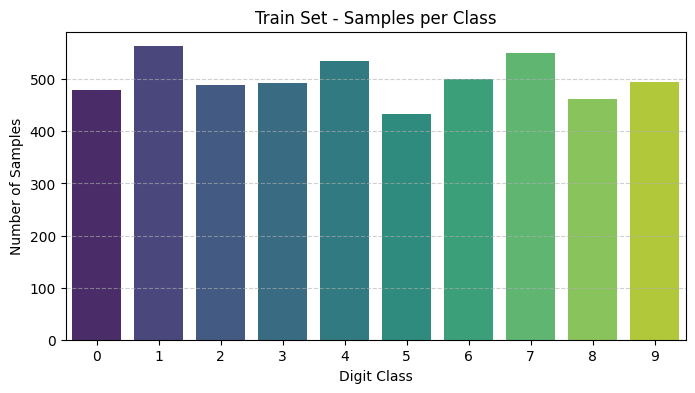

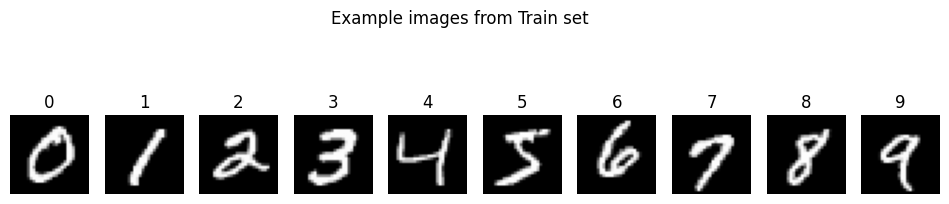

=== Test Dataset ===
Number of samples: 1000
Image shape: (28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]
Class 0: 85 samples
Class 1: 126 samples
Class 2: 116 samples
Class 3: 107 samples
Class 4: 110 samples
Class 5: 87 samples
Class 6: 87 samples
Class 7: 99 samples
Class 8: 89 samples
Class 9: 94 samples


/tmp/ipython-input-3187230306.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(class_counts)), y=class_counts, palette="viridis")


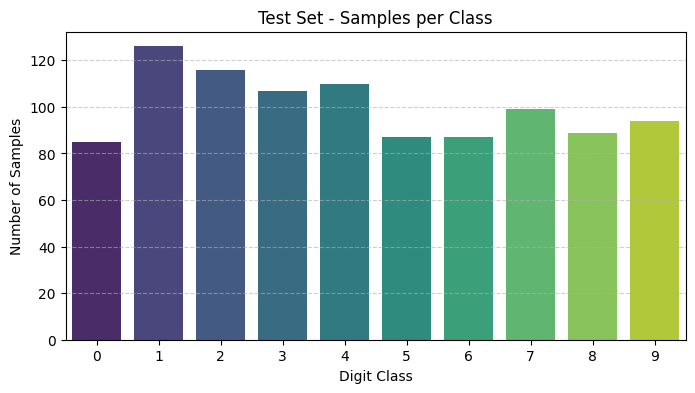

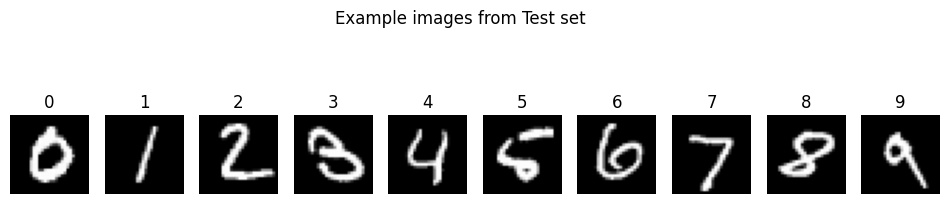

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def dataset_statistics(images, labels, dataset_name="Train"):
    print(f"=== {dataset_name} Dataset ===")
    print("Number of samples:", len(labels))
    print("Image shape:", images.shape[1:])  # skip batch dimension
    print("Unique labels:", np.unique(labels))

    # Count samples per class
    class_counts = np.bincount(labels)
    for i, count in enumerate(class_counts):
        print(f"Class {i}: {count} samples")

    # Plot class distribution
    plt.figure(figsize=(8,4))
    sns.barplot(x=np.arange(len(class_counts)), y=class_counts, palette="viridis")
    plt.title(f"{dataset_name} Set - Samples per Class")
    plt.xlabel("Digit Class")
    plt.ylabel("Number of Samples")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

    # Optional: show some example images from each class
    plt.figure(figsize=(12,3))
    for i in range(10):
        idx = np.where(labels == i)[0][0]  # first sample of class i
        plt.subplot(1, 10, i+1)
        plt.imshow(images[idx], cmap='gray')
        plt.axis('off')
        plt.title(f"{i}")
    plt.suptitle(f"Example images from {dataset_name} set")
    plt.show()

# -------------------------
# Run diagnostics
# -------------------------
dataset_statistics(train_images, train_labels, "Train")
dataset_statistics(test_images, test_labels, "Test")

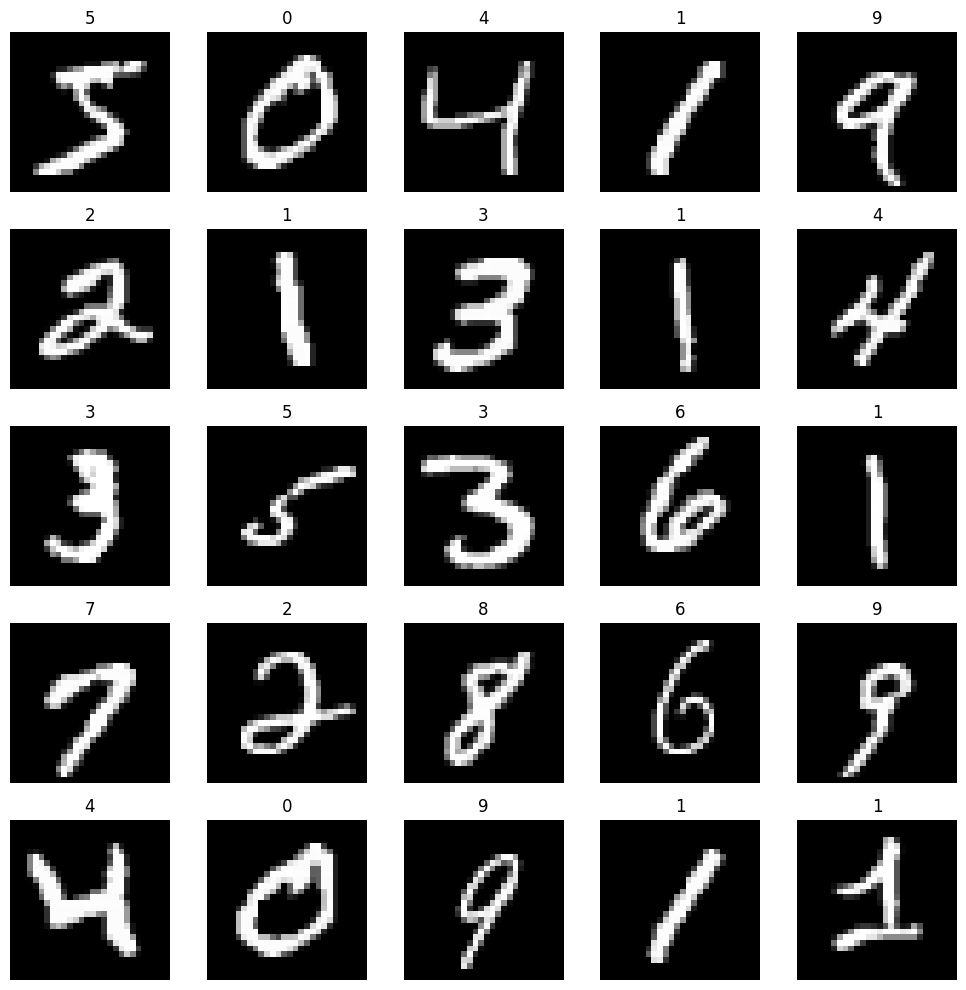

In [5]:
import matplotlib.pyplot as plt

# -------------------------
# Function to plot 5x5 grid
# -------------------------
def plot_mnist_grid(images, labels, grid_size=5):
    """
    Plots a grid of MNIST images with labels.

    images: numpy array of shape (N, 28, 28)
    labels: numpy array of shape (N,)
    grid_size: number of rows and cols (default 5x5)
    """
    fig, axes = plt.subplots(grid_size, grid_size, figsize=(10, 10))
    axes = axes.flatten()

    for i in range(grid_size * grid_size):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(str(labels[i]))
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# -------------------------
# Example usage with your data
# -------------------------
plot_mnist_grid(train_images, train_labels)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    cohen_kappa_score,
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier


In [7]:
# -------------------------
# Flatten MNIST images for scikit-learn
# -------------------------
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
y_train = train_labels
y_test = test_labels

In [8]:
# -------------------------
# Define classifiers
# -------------------------
models = {
    "LogisticRegression": LogisticRegression(max_iter=200, solver='lbfgs', multi_class='auto'),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "DecisionTree": DecisionTreeClassifier(max_depth=10),
    "GaussianNB": GaussianNB(),
    "LinearSVC": LinearSVC(max_iter=2000),
    "ExtraTrees": ExtraTreesClassifier(n_estimators=50, max_depth=10)
}

# -------------------------
# Metrics container
# -------------------------
metrics_names = ['accuracy', 'precision', 'recall', 'f1', 'cohen_kappa']
results = {name: [] for name in models.keys()}

In [9]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import pandas as pd

# -------------------------
# Metrics container
# -------------------------

train_report = {}
test_report = {}

# -------------------------
# Cross-validation setup
# -------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------
# Scorers
# -------------------------
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'f1_macro': make_scorer(f1_score, average='macro')
}

# -------------------------
# Train models and evaluate
# -------------------------
for name, model in models.items():
    print(f"Training {name}...")

    # Use cross_validate once for all metrics
    cv_results = cross_validate(
        model, X_train, y_train,
        cv=cv,
        scoring=scorers,
        n_jobs=-1,  # parallelize folds if possible
        return_train_score=False
    )

    # Mapping metrics_names to scorer keys
    metric_key_map = {
        'accuracy': 'accuracy',
        'precision': 'precision_macro',
        'recall': 'recall_macro',
        'f1': 'f1_macro'
    }

    # Store CV metrics in train report (means/stds)
    train_report[name] = {
        **{metric + '_mean': np.mean(cv_results['test_' + metric_key_map[metric]])
           for metric in ['accuracy', 'precision', 'recall', 'f1']},
        **{metric + '_std': np.std(cv_results['test_' + metric_key_map[metric]])
           for metric in ['accuracy', 'precision', 'recall', 'f1']}
    }

    # Fit on full training set for test evaluation
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)

    # Compute metrics for test set
    test_report[name] = {
        'accuracy': accuracy_score(y_test, y_pred_test),
        'precision': precision_score(y_test, y_pred_test, average='macro'),
        'recall': recall_score(y_test, y_pred_test, average='macro'),
        'f1': f1_score(y_test, y_pred_test, average='macro')
    }

# -------------------------
# Display reports
# -------------------------
train_df = pd.DataFrame(train_report).T.round(4)
test_df = pd.DataFrame(test_report).T.round(4)

print("=== TRAINING REPORT (CV metrics) ===")
display(train_df)

print("\n=== TEST REPORT (full set metrics) ===")
display(test_df)

Training LogisticRegression...


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training KNN...
Training DecisionTree...
Training GaussianNB...
Training LinearSVC...
Training ExtraTrees...
=== TRAINING REPORT (CV metrics) ===


,accuracy_mean,precision_mean,recall_mean,f1_mean,accuracy_std,precision_std,recall_std,f1_std
LogisticRegression,0.9022,0.9018,0.9000,0.9001,0.0062,0.0061,0.0060,0.0063
KNN,0.9380,0.9409,0.9363,0.9373,0.0086,0.0074,0.0087,0.0083
DecisionTree,0.7850,0.7820,0.7811,0.7806,0.0116,0.0120,0.0112,0.0115
GaussianNB,0.6006,0.6621,0.5961,0.5667,0.0192,0.0206,0.0179,0.0240
LinearSVC,0.8814,0.8800,0.8787,0.8785,0.0076,0.0085,0.0076,0.0080
ExtraTrees,0.9240,0.9252,0.9225,0.9231,0.0094,0.0095,0.0093,0.0094



=== TEST REPORT (full set metrics) ===


,accuracy,precision,recall,f1
LogisticRegression,0.883,0.8802,0.8813,0.8804
KNN,0.909,0.9106,0.9083,0.9078
DecisionTree,0.760,0.7535,0.7552,0.7528
GaussianNB,0.560,0.6498,0.5666,0.5228
LinearSVC,0.849,0.8481,0.8465,0.8464
ExtraTrees,0.908,0.9060,0.9071,0.9057


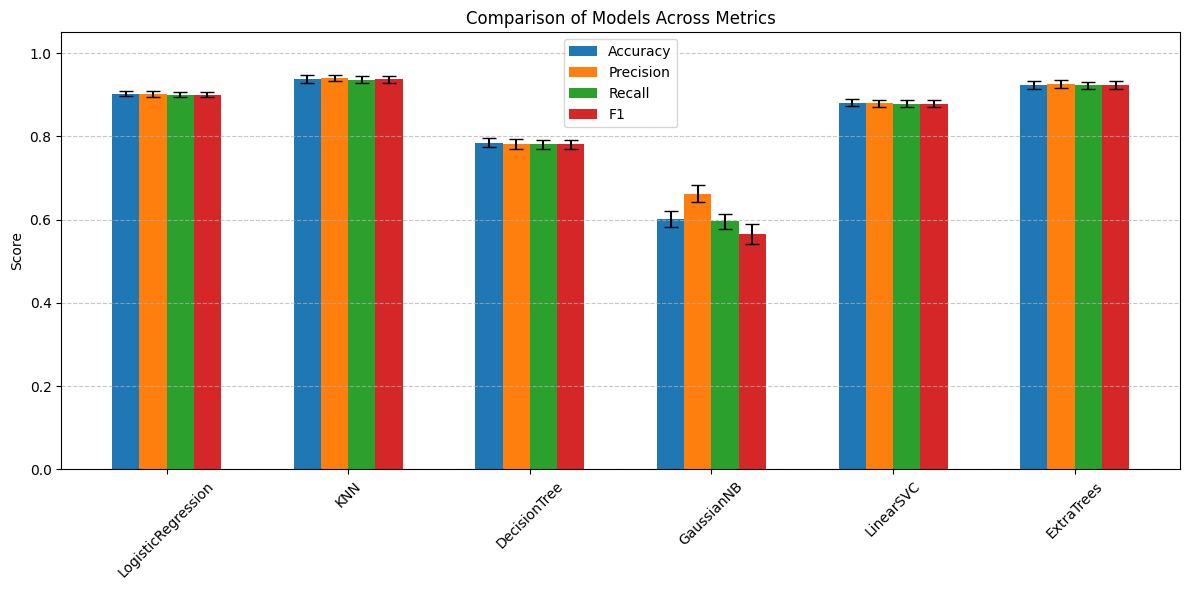

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# Metrics to plot
# -------------------------
metrics_mean = ['accuracy_mean', 'precision_mean', 'recall_mean', 'f1_mean']
metrics_std  = ['accuracy_std', 'precision_std', 'recall_std', 'f1_std']
metric_labels = [m.replace("_mean","").replace("_"," ").title() for m in metrics_mean]

models_list = list(train_report.keys())
n_models = len(models_list)
n_metrics = len(metrics_mean)

# Bar width and positions
bar_width = 0.15
x = np.arange(n_models)

plt.figure(figsize=(n_models*2,6))  # make it wide if many models

# Plot each metric
for i, (mean_metric, std_metric) in enumerate(zip(metrics_mean, metrics_std)):
    means = [train_report[m][mean_metric] for m in models_list]
    stds  = [train_report[m][std_metric] for m in models_list]
    plt.bar(x + i*bar_width, means, width=bar_width, yerr=stds, capsize=5, label=metric_labels[i])

plt.xticks(x + bar_width*(n_metrics-1)/2, models_list, rotation=45)
plt.ylabel("Score")
plt.title("Comparison of Models Across Metrics")
plt.ylim(0,1.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

DAY 28/01/2026

Experiment-3:
Give a pictorial representation of ANN and load the dataset Churn_Modelling.csv.

Perform the following operation:

Read data set and print top 10 rows of dataset.

Perform feature engineering.

Create ANN model with 5 dense layer with 10,15,19,24,28 number of neurons in each layer.

Train the model for 100 epochs.

Draw the loss and Accuracy graph

In [13]:
import pandas as pd

# Load dataset
data = pd.read_csv("/content/Churn_Modelling.csv")

# Print top 10 rows
print(data.head(10))


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   
5          6    15574012       Chu          645     Spain    Male   44   
6          7    15592531  Bartlett          822    France    Male   50   
7          8    15656148    Obinna          376   Germany  Female   29   
8          9    15792365        He          501    France    Male   44   
9         10    15592389        H?          684    France    Male   27   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0       

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical columns
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

# Split X and y
X = data.drop('Exited', axis=1)
y = data['Exited']

# Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build ANN model
model = Sequential()

model.add(Dense(10, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(15, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(28, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 19)             │           304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 24)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 28)             │           700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,788 (6.98 KB)

 Trainable params: 1,788 (6.98 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history = model.fit(
    X, y,
    epochs=100,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7865 - loss: 0.5478 - val_accuracy: 0.8045 - val_loss: 0.4568
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4486 - val_accuracy: 0.8185 - val_loss: 0.4131
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8399 - loss: 0.3802 - val_accuracy: 0.8355 - val_loss: 0.3868
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8515 - loss: 0.3616 - val_accuracy: 0.8445 - val_loss: 0.3740
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.3596 - val_accuracy: 0.8490 - val_loss: 0.3670
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8581 - loss: 0.3467 - val_accuracy: 0.8475 - val_loss: 0.3628
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8593 - loss: 0.3440 - val_accuracy: 0.8480 - val_loss: 0.3654
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8547 - loss: 0.3495 - val_accu

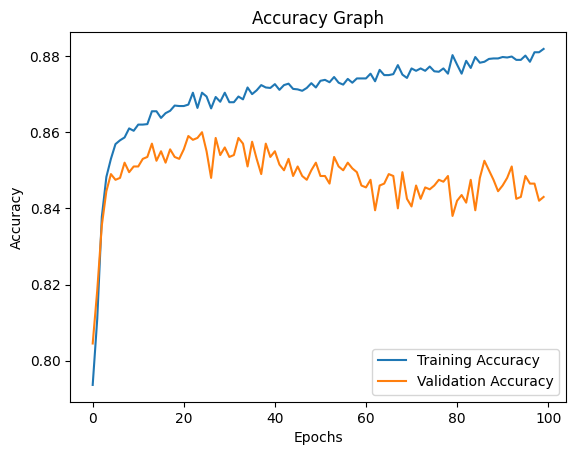

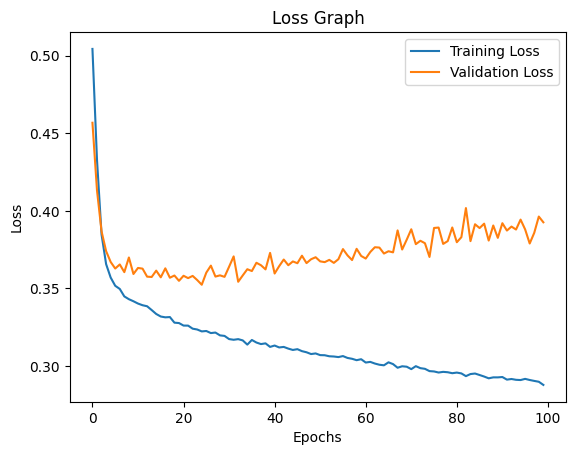

In [17]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Graph')
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Graph')
plt.show()
